In [18]:
import bs4         
import requests    
import textwrap    
import time
 
# 全ページ分をリストにする
def get_all_reviews(url):
    rvw_list = []
    i = 1
    while True:
        print(i,'searching')
        i += 1
        res = requests.get(url)
        amazon_soup = bs4.BeautifulSoup(res.text, features='lxml')
        rvws = amazon_soup.select('.review-text')
        for rvw in rvws:
            rvw_list.append(rvw)
             
        # 次へボタン
        next_page = amazon_soup.select('li.a-last a')   
 
        if next_page != []:    
            next_url = 'https://www.amazon.co.jp/' + next_page[0].attrs['href']    
            url = next_url
            # 最低でも1秒は間隔をあける
            time.sleep(1)       
        else:
            break
 
    return rvw_list
 
if __name__ == '__main__':
     
    #　Amzon商品ページ
    url = 'https://www.amazon.co.jp/%E6%89%8B%E6%8C%87%E6%B6%88%E6%AF%92%E5%89%A4%E3%80%91%E3%83%8F%E3%83%B3%E3%83%89%E3%82%B9%E3%82%AD%E3%83%83%E3%82%B7%E3%83%A5EX-%E3%81%A4%E3%81%91%E3%81%8B%E3%81%88%E7%94%A8-800ml-%E8%8A%B1%E7%8E%8B%E3%83%97%E3%83%AD%E3%83%95%E3%82%A7%E3%83%83%E3%82%B7%E3%83%A7%E3%83%8A%E3%83%AB%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-%E6%8C%87%E5%AE%9A%E5%8C%BB%E8%96%AC%E9%83%A8%E5%A4%96%E5%93%81/dp/B005RUI15O/'
    
    # URLをレビューページのものに書き換える
    new_url = url.replace('dp', 'product-reviews')
    # レビューの取得
    rvw_list = get_all_reviews(new_url)    
 
    # 全データを表示
    for i in range(len(rvw_list)):
        rvw_text = textwrap.fill(rvw_list[i].text, 80)
        print('\nNo.{} : '.format(i+1))
        print(rvw_text)

1 searching
2 searching

No.1 : 
    ホームセンターで見かけて、3ヶ月程で使い切り付け替え用を購入しました。ビオレu の業務用なのか成分は同じ様です。介護で日常的に使用するのでコスパが良いも
のが遠慮なく使え助かります。付け替えた後もプッシュすると勢いよく出ます。5/27　新型コロナウイルス流行で家庭用に供給されなかったのですが、5/30出荷予定で購
入制限付きですが、Amazonプライム価格にて予約注文出来ました。アルコール消毒剤、エタノール製剤などが品薄・僅少となっているので、値段の変動はあると思います。
コロナ前は540円程のお得価格で購入できたのが、今回は1290円に2.5倍程の高騰徐々に大規模イベントやプロスポーツなどの開催等で需要は減らないのでは。気温が上
がる8月までに供給過剰で値崩れも考えられるが、感染予防対策の重要性を忘れてはいけない。予約注文後の数時間で「この商品は現在お取り扱いできません。」の欠品状態にな
りました。購入を希望される方は、毎日数回の確認で、もし注文可能な時は即決で購入する事が望ましいと思います。即決の単品購入となるので、送料込みで1,290円の価格
は妥当だと思います。5/30　ホームセンター　コ◆リにビオレUは普通に棚に陳列されていました。通常価格でした。　　　業務用の本製品（860円）は欠品中でした。　
　　花王が量産体制で医療機関向けに供給し5月下旬には一般家庭用に供給出来ると　　　4月にコメントしていました。　　　地方なので4月に市内で感染者が複数出ましたが
、それ以降は出ていません。　　　隣のスーパーで買い物したのですが、入り口に設置してある手指消毒容器は空っぽで利用できず。　　　家庭では消毒液が手に入らなかったの
でハンドソープでの手洗いが習慣化されたので　　　コロナ感染が落ち着いている地方では既に供給過多になるのか？5/31　予定とおり午前中に届きました。日曜日の小雨の
なかをクロネコさんに配達して貰えました。　　　高齢者の在宅介護で日常的に利用しているので無くなる前に届きました。6/24　一般の販売が中止されました。　　　（A
mazonのコメント）　　　Amazonが新型コロナウイルス感染症対策に取り組む医療機関・政府機関として認証した　　　ビジネスアカウントのお客様のみ、ご

In [1]:
from time import sleep
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import textwrap
import csv

#chromedriver.exeのパスを設定
chrome_path = r'C:\Program Files\chromedriver_win32\Chromedriver'


#　amazonのレビュー情報をseleniumで取得する_引数：amazonの商品URL
def get_amazon_page_info(url):
   text = ""
   options = Options()
   #　シークレットモード
   options.add_argument('--incognito')
   #　ヘッドレスモード
   # options.add_argument('--headless')
    
   #　chromedriverのパスとパラメータを設定
   driver = webdriver.Chrome(executable_path=chrome_path,options=options)
   driver.get(url)
   driver.implicitly_wait(10)
   text = driver.page_source
   
   driver.quit()
   
   return text

# リストにストア
def get_all_reviews(url):
   review_list = []
   i = 1
   while True:
       #print(i,'page_search')
       i += 1
       text = get_amazon_page_info(url)
       amazon_bs = BeautifulSoup(text, features='lxml')
       #　レビューのテキスト取得
       reviews = amazon_bs.select('.review-text')
       
       for review in reviews:
           #　レビューをreview_listにストア
           review_list.append(review)
       
       # 次へ ボタン取得
       next_page = amazon_bs.select('li.a-last a')
       
       # 次のページが存在する場合
       if next_page != []: 
           # 次のページのURLを生成   
           next_url = 'https://www.amazon.co.jp/' + next_page[0].attrs['href']    
           url = next_url
           
           sleep(1)
       else:
                  break

   return review_list


if __name__ == '__main__':
    
   #　ゼロから作るDeep Learning 2 自然言語処理編
   url = 'https://www.amazon.co.jp/%E3%82%BC%E3%83%AD%E3%81%8B%E3%82%89%E4%BD%9C%E3%82%8BDeep-Learning-%E2%80%95%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%86%E7%B7%A8-%E6%96%8E%E8%97%A4-%E5%BA%B7%E6%AF%85/dp/4873118360/ref=pd_bxgy_img_1/355-0524326-3450411?pd_rd_w=2Mdz9&pf_rd_p=d8f6e0ab-48ef-4eca-99d5-60d97e927468&pf_rd_r=VV4FVMSSH32HCQG7450Y&pd_rd_r=f2b4ef82-efd8-4bf5-a964-4b6aaf2ce2f6&pd_rd_wg=0e0uG&pd_rd_i=4873118360&psc=1'
   
   # レビューページのURL
   review_url = url.replace('dp', 'product-reviews')
   #
   review_list = get_all_reviews(review_url)    

   #CSVにレビュー出力
   with open('sample.csv','w') as f:
       writer = csv.writer(f, lineterminator='\n')

       
       for i in range(len(review_list)):
           csvlist=[]
           review_text = textwrap.fill(review_list[i].text, 80)
           #　No.i+1
#            csvlist.append('No.{} : '.format(i+1))
           #　レビューの先頭 末尾の空白文字除去
           csvlist.append(review_text.strip())
           # 出力    
           writer.writerow(csvlist)                    
       # ファイルクローズ
       f.close()

In [5]:
# with open('sample.csv', mode='r', encoding='shift-jis') as f:
with open('sample2.csv', mode='r', encoding='cp932') as f:
#   content = f.read()
  lines = f.readlines()
# print(content)
print(*lines[:15])

"そうそう、こういうことが知りたかった！ライブラリの使い方なんてちょっと検索すればわかる。数学的・構造的な解説が丁寧にされていて、とても良かったです！
 ありがとうございます！最初この本から読み始めましたが1章に時間がかかり過ぎ、「ゼロから作るDeepLeaning」(1の方)から出直しました。
 1日8時間くらいとしてゼロから作るDeep Leaning　5日ゼロから作るDeep Leaning 2(本書)　10日くらいで読了しました。最初から1の方を読んでいれば、2はもうちょっと早く読めたと思います。
 最後の方で、一見同じに見える変数が関数によって異なることに気づき、だーっと戻って確認したので、そこに最初から気づいている人は更に早く読み終えられると思います。
 先に言ってよ的な部分は1に比べると2の方がちょっと多いかな(汗)。
 最終的にはわかります。数学的には、線形代数と微分積分、ちょっとだけ情報理論、の知識があった方がわかりやすいです。
 ポイントは配列の出てくる形を確認すること。git-hubから落としてきたスクリプトを全て解読し、printを挿入しながら動かして確認しました。
 また、本スクリプト以外に、端末でインタプリタ or spyderを起動しておいて、ちょっとした関数の出力結果などを確認しながら読み進めました。
 pythonのcopyの性質を生かして作った部分がとっても参考になりました。「そうかー、こうやって書くんだ！」って、うなっちゃいました。
 さらっと解読しただけだと、ものすごくよくわかってる人以外は気付かないと思います。「ん？」って思ったところはあるので、まとめてオライリーにメールしてみようと思っています。
 もしかしたらもう改訂されてるかな？オライリーさん、ごめんなさい。私は今までオライリーの本の良い評判を一度も聞いたことがなかったので、1冊も持っていませんでした。これを機に考え方を改めます(笑)。
 どこの本でもそうだけど、日本人が書いたのか訳書なのかという境目はある気がする。訳の良し悪しではなく、ツボが違う、みたいな。
 あと、本書は文字フォントが読みやすいです(書籍で購入)。"
 "まえがきに「冒険の書」また「問題」とその「解決」とあるとおり、「問題」とその「解決」を軸に話を進めるのは、一般向けの読み物(や特許明細書)に限らず

In [6]:
import re
import unicodedata

prepped_lines = []
for line in lines[1:]:
    # 行の前後の空白コード(半角スペース、改行コードなど))を削除
    line = line.strip()

    # Unicode の全角スペースを削除
    line = re.sub(r"\u3000+", " ", line)
    
    # 文字正規化 数値-半角 カナ-全角
    line = unicodedata.normalize('NFKC', line)
    
    # "を削除
    line = re.sub(r'"', ' ', line)
    
    # ・を削除
    line = re.sub(r'・', ' ', line)
    
    # ＞を削除
    line = re.sub(r'＞', ' ', line)
    
    # ,を、に変換
    line = re.sub(r',', '、', line)

    # 変換後の行が空行の場合は、スキップ
    if line == "":
        continue
    prepped_lines.append(line)

prepped_lines[:10]

['ありがとうございます!最初この本から読み始めましたが1章に時間がかかり過ぎ、「ゼロから作るDeepLeaning」(1の方)から出直しました。',
 '1日8時間くらいとしてゼロから作るDeep Leaning 5日ゼロから作るDeep Leaning 2(本書) 10日くらいで読了しました。最初から1の方を読んでいれば、2はもうちょっと早く読めたと思います。',
 '最後の方で、一見同じに見える変数が関数によって異なることに気づき、だーっと戻って確認したので、そこに最初から気づいている人は更に早く読み終えられると思います。',
 '先に言ってよ的な部分は1に比べると2の方がちょっと多いかな(汗)。',
 '最終的にはわかります。数学的には、線形代数と微分積分、ちょっとだけ情報理論、の知識があった方がわかりやすいです。',
 'ポイントは配列の出てくる形を確認すること。git-hubから落としてきたスクリプトを全て解読し、printを挿入しながら動かして確認しました。',
 'また、本スクリプト以外に、端末でインタプリタ or spyderを起動しておいて、ちょっとした関数の出力結果などを確認しながら読み進めました。',
 'pythonのcopyの性質を生かして作った部分がとっても参考になりました。「そうかー、こうやって書くんだ!」って、うなっちゃいました。',
 'さらっと解読しただけだと、ものすごくよくわかってる人以外は気付かないと思います。「ん?」って思ったところはあるので、まとめてオライリーにメールしてみようと思っています。',
 'もしかしたらもう改訂されてるかな?オライリーさん、ごめんなさい。私は今までオライリーの本の良い評判を一度も聞いたことがなかったので、1冊も持っていませんでした。これを機に考え方を改めます(笑)。']

In [7]:
body = ' '.join(prepped_lines)
print(body)

ありがとうございます!最初この本から読み始めましたが1章に時間がかかり過ぎ、「ゼロから作るDeepLeaning」(1の方)から出直しました。 1日8時間くらいとしてゼロから作るDeep Leaning 5日ゼロから作るDeep Leaning 2(本書) 10日くらいで読了しました。最初から1の方を読んでいれば、2はもうちょっと早く読めたと思います。 最後の方で、一見同じに見える変数が関数によって異なることに気づき、だーっと戻って確認したので、そこに最初から気づいている人は更に早く読み終えられると思います。 先に言ってよ的な部分は1に比べると2の方がちょっと多いかな(汗)。 最終的にはわかります。数学的には、線形代数と微分積分、ちょっとだけ情報理論、の知識があった方がわかりやすいです。 ポイントは配列の出てくる形を確認すること。git-hubから落としてきたスクリプトを全て解読し、printを挿入しながら動かして確認しました。 また、本スクリプト以外に、端末でインタプリタ or spyderを起動しておいて、ちょっとした関数の出力結果などを確認しながら読み進めました。 pythonのcopyの性質を生かして作った部分がとっても参考になりました。「そうかー、こうやって書くんだ!」って、うなっちゃいました。 さらっと解読しただけだと、ものすごくよくわかってる人以外は気付かないと思います。「ん?」って思ったところはあるので、まとめてオライリーにメールしてみようと思っています。 もしかしたらもう改訂されてるかな?オライリーさん、ごめんなさい。私は今までオライリーの本の良い評判を一度も聞いたことがなかったので、1冊も持っていませんでした。これを機に考え方を改めます(笑)。 どこの本でもそうだけど、日本人が書いたのか訳書なのかという境目はある気がする。訳の良し悪しではなく、ツボが違う、みたいな。 あと、本書は文字フォントが読みやすいです(書籍で購入)。   まえがきに「冒険の書」また「問題」とその「解決」とあるとおり、「問題」とその「解決」を軸に話を進めるのは、一般向けの読み物(や特許明細書)に限らず、こういった専門的な解説書でも構成の仕方として非常に正しいと思います(そうでないと面白くもないし、内容の理解も進まないわけですから)。 なので具体的な難しい中身が分からなくても何

In [8]:
import pandas as pd
df = pd.DataFrame(prepped_lines, columns=['text'])
df['text'] = df['text'].str.replace('\n', '')
df

,text
0,ありがとうございます!最初この本から読み始めましたが1章に時間がかかり過ぎ、「ゼロから作るD...
1,1日8時間くらいとしてゼロから作るDeep Leaning 5日ゼロから作るDeep Lea...
2,最後の方で、一見同じに見える変数が関数によって異なることに気づき、だーっと戻って確認したので...
3,先に言ってよ的な部分は1に比べると2の方がちょっと多いかな(汗)。
4,最終的にはわかります。数学的には、線形代数と微分積分、ちょっとだけ情報理論、の知識があった方...
...,...
116,ゼロから作るDeep Learningに引き続き読書会を企画しています。前著は Deep ...
117,前著では、Pythonの導入、操作の仕方に馴染んでいない方は次第に足が遠のいたような気がしま...
118,また、生命科学、社会科学における統計 確率の扱いに慣れていないと、過剰な期待を生むということ...
119,自然言語のように正解のない分野での、人間の能力を超える処理の判定基準がまだ見えていません。


In [23]:
import numpy
# 再現性を担保するため、乱数のシードを明示的に指定
numpy.random.seed(9)

# ランダムに選んだ行から10行を表示
sample_line_idx = numpy.random.randint(0, len(prepped_lines))
print("sample_line_idx:", sample_line_idx)
prepped_lines[sample_line_idx:sample_line_idx+10]

sample_line_idx: 92


['6.ゲート付きRNN前章RNNの問題点: 時系列データの長期の依存関係をうまく学習できない 勾配消失、または勾配爆発がおきてしまう tanh;y=tanh(x)の微分の値は1.0以下でxが0から遠ざかるにつれて値が小さくなる。',
 'つまり、tanhを逆伝播で通過するたび値が小さくなり勾配消失する。',
 'matmal:逆伝播で繰り返し通過するごとに、重みが1より大きいと勾配爆発、1より小さいと勾配消失する。勾配爆発対策: 勾配クリッピング:閾値を超えたら勾配を修正する。勾配消失対策: ゲート付きRNN(LSTM、GRUなど。ゲート:開くか閉じるかだけでなく、どの割合(0~1の実数)で開くかをゲートでコントロールする) inputゲート forgetゲート outputゲート など。',
 'LSTMのさらなる改善: LSTMレイヤの多層化:PTBデータセットの場合2~4層が適す。 Dropoutによる過学習の抑制:ネットワークのニューロンをランダムで切断。',
 '時間軸と独立して、深さ方向にDropoutレイヤを追加する。 重み共有:embeddingレイヤとAffineレイヤで重み共有。学習パラメータを減らせる。',
 '7.RNNによる文章作成時系列データを別の時系列データに変換するモデルとしてのseq2seqRNNを2つ組み合わせたもの。Encode-Decoderモデルとも言われる。RNNによる文章生成。seq2seqで計算式から計算結果を答えられるように学習させる。実装と学習と評価。',
 'seq2se1のさらなる改良: 入力データの反転 による学習効果向上:57+5 → 5+75 変換後の各要素の距離が掴みやすくなるため、勾配が伝わりやすく学習効率が上がる。 Peeky:覗き見 Encoderから出力された直後のデータは全てが詰まっているので、それを他の層にも共有する。',
 '8.Attentionseq2seqを更に強力にする「注意機構(attention mechanism)」 重要な情報に注意を向けさせる seq2seqには問題点があり、入力分の長さに関わらず、出力が固定長のベクトルである。そのため、必要な情報が収まり切れなくなる。',
 '改良: Encoder:LSTMレイヤの隠れ状態のベクトルをすべて利用できるようにする De

In [14]:
import MeCab

mecab = MeCab.Tagger('-Ochasen -d "C:/Program Files/MeCab/dic/mecab-ipadic-neologd"')
sent = "鬼滅の刃"
mecab.parse('')
print(mecab.parse(sent))

鬼滅の刃	キメツノヤイバ	鬼滅の刃	名詞-固有名詞-一般		
EOS



In [10]:
import MeCab

tagger = MeCab.Tagger()

parsed = tagger.parse(body).split('\n')
parsed


['ありがとう\t感動詞,*,*,*,*,*,ありがとう,アリガトウ,アリガトー',
 'ござい\t助動詞,*,*,*,五段・ラ行特殊,連用形,ござる,ゴザイ,ゴザイ',
 'ます\t助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス',
 '!\t名詞,サ変接続,*,*,*,*,*',
 '最初\t名詞,一般,*,*,*,*,最初,サイショ,サイショ',
 'この\t連体詞,*,*,*,*,*,この,コノ,コノ',
 '本\t名詞,一般,*,*,*,*,本,ホン,ホン',
 'から\t助詞,格助詞,一般,*,*,*,から,カラ,カラ',
 '読み\t動詞,自立,*,*,五段・マ行,連用形,読む,ヨミ,ヨミ',
 '始め\t動詞,非自立,*,*,一段,連用形,始める,ハジメ,ハジメ',
 'まし\t助動詞,*,*,*,特殊・マス,連用形,ます,マシ,マシ',
 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ',
 'が\t助詞,接続助詞,*,*,*,*,が,ガ,ガ',
 '1\t名詞,数,*,*,*,*,*',
 '章\t名詞,接尾,助数詞,*,*,*,章,ショウ,ショー',
 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ',
 '時間\t名詞,副詞可能,*,*,*,*,時間,ジカン,ジカン',
 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ',
 'かかり\t動詞,自立,*,*,五段・ラ行,連用形,かかる,カカリ,カカリ',
 '過ぎ\t動詞,非自立,*,*,一段,連用形,過ぎる,スギ,スギ',
 '、\t記号,読点,*,*,*,*,、,、,、',
 '「\t記号,括弧開,*,*,*,*,「,「,「',
 'ゼロ\t名詞,数,*,*,*,*,ゼロ,ゼロ,ゼロ',
 'から\t助詞,格助詞,一般,*,*,*,から,カラ,カラ',
 '作る\t動詞,自立,*,*,五段・ラ行,基本形,作る,ツクル,ツクル',
 'DeepLeaning\t名詞,固有名詞,組織,*,*,*,*',
 '」\t記号,括弧閉,*,*,*,*,」,」,」',
 '(\t名詞,サ変接続,*,*,*,*,*',
 '1\t名詞,数,*,*,*,*,*',
 'の\t助詞,連体化,*,*,*,*,の,ノ,ノ',
 '方\t名詞,非自立,一般,*,*,*,方,ホウ,ホー',

####  \tを,に変換

In [11]:
import re
*values, = map(lambda s: re.split(r'\t|,', s), parsed)
values[:10]

[['ありがとう', '感動詞', '*', '*', '*', '*', '*', 'ありがとう', 'アリガトウ', 'アリガトー'],
 ['ござい', '助動詞', '*', '*', '*', '五段・ラ行特殊', '連用形', 'ござる', 'ゴザイ', 'ゴザイ'],
 ['ます', '助動詞', '*', '*', '*', '特殊・マス', '基本形', 'ます', 'マス', 'マス'],
 ['!', '名詞', 'サ変接続', '*', '*', '*', '*', '*'],
 ['最初', '名詞', '一般', '*', '*', '*', '*', '最初', 'サイショ', 'サイショ'],
 ['この', '連体詞', '*', '*', '*', '*', '*', 'この', 'コノ', 'コノ'],
 ['本', '名詞', '一般', '*', '*', '*', '*', '本', 'ホン', 'ホン'],
 ['から', '助詞', '格助詞', '一般', '*', '*', '*', 'から', 'カラ', 'カラ'],
 ['読み', '動詞', '自立', '*', '*', '五段・マ行', '連用形', '読む', 'ヨミ', 'ヨミ'],
 ['始め', '動詞', '非自立', '*', '*', '一段', '連用形', '始める', 'ハジメ', 'ハジメ']]

####  データフレームに格納

In [12]:
import pandas as pd
columns = ['表層形', '品詞', '品詞細分類1', '品詞細分類2', '品詞細分類3', '活用型', '活用形', '原形', '読み', '発音']
mecab_df = pd.DataFrame(data=values, columns=columns)
print(len(mecab_df))
mecab_df.head(10)

6745


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,ありがとう,感動詞,*,*,*,*,*,ありがとう,アリガトウ,アリガトー
1,ござい,助動詞,*,*,*,五段・ラ行特殊,連用形,ござる,ゴザイ,ゴザイ
2,ます,助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス
3,!,名詞,サ変接続,*,*,*,*,*,None,None
4,最初,名詞,一般,*,*,*,*,最初,サイショ,サイショ
5,この,連体詞,*,*,*,*,*,この,コノ,コノ
6,本,名詞,一般,*,*,*,*,本,ホン,ホン
7,から,助詞,格助詞,一般,*,*,*,から,カラ,カラ
8,読み,動詞,自立,*,*,五段・マ行,連用形,読む,ヨミ,ヨミ
9,始め,動詞,非自立,*,*,一段,連用形,始める,ハジメ,ハジメ


####  原形と品詞をグループ化して件数確認

In [13]:
print(mecab_df.groupby(['原形','品詞']).size().sort_values(ascending=False))

原形    品詞
*     名詞    734
の     助詞    354
、     記号    263
。     記号    236
を     助詞    210
           ... 
予定    名詞      1
指南    名詞      1
予め    副詞      1
指針    名詞      1
やっぱり  副詞      1
Length: 1133, dtype: int64


####  名詞に絞り込んだデータフレーム

In [14]:
noun = mecab_df.loc[mecab_df['品詞'] == '名詞']
noun

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
3,!,名詞,サ変接続,*,*,*,*,*,None,None
4,最初,名詞,一般,*,*,*,*,最初,サイショ,サイショ
6,本,名詞,一般,*,*,*,*,本,ホン,ホン
13,1,名詞,数,*,*,*,*,*,None,None
14,章,名詞,接尾,助数詞,*,*,*,章,ショウ,ショー
...,...,...,...,...,...,...,...,...,...,...
6727,前作,名詞,一般,*,*,*,*,前作,ゼンサク,ゼンサク
6729,データ,名詞,一般,*,*,*,*,データ,データ,データ
6731,利用,名詞,サ変接続,*,*,*,*,利用,リヨウ,リヨー
6734,文章,名詞,一般,*,*,*,*,文章,ブンショウ,ブンショー


####  名詞と動詞に絞り込んだデータフレーム

In [15]:
verb = mecab_df.loc[(mecab_df['品詞'] == '名詞')|(mecab_df['品詞'] == '動詞')]
verb

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
3,!,名詞,サ変接続,*,*,*,*,*,None,None
4,最初,名詞,一般,*,*,*,*,最初,サイショ,サイショ
6,本,名詞,一般,*,*,*,*,本,ホン,ホン
8,読み,動詞,自立,*,*,五段・マ行,連用形,読む,ヨミ,ヨミ
9,始め,動詞,非自立,*,*,一段,連用形,始める,ハジメ,ハジメ
...,...,...,...,...,...,...,...,...,...,...
6732,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
6734,文章,名詞,一般,*,*,*,*,文章,ブンショウ,ブンショー
6735,評価,名詞,サ変接続,*,*,*,*,評価,ヒョウカ,ヒョーカ
6738,見つけ,動詞,自立,*,*,一段,未然形,見つける,ミツケ,ミツケ


####  ストップワード削除

In [17]:
with open('stop_words.txt', mode='r', encoding='UTF-8-sig') as f:
  stop_words = f.read().split()
stop_words

['する', 'いる', 'なる', 'れる', 'よう', 'こと', 'ある', 'いく']

In [18]:
print(len(noun))
noun = noun.loc[~noun['原形'].isin(stop_words)] 
print(len(noun))
display(noun.head())

print(len(verb))
verb = verb.loc[~verb['原形'].isin(stop_words)] 
print(len(verb))
display(verb.head())

2850
2800


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
3,!,名詞,サ変接続,*,*,*,*,*,None,None
4,最初,名詞,一般,*,*,*,*,最初,サイショ,サイショ
6,本,名詞,一般,*,*,*,*,本,ホン,ホン
13,1,名詞,数,*,*,*,*,*,None,None
14,章,名詞,接尾,助数詞,*,*,*,章,ショウ,ショー


3667
3250


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
3,!,名詞,サ変接続,*,*,*,*,*,None,None
4,最初,名詞,一般,*,*,*,*,最初,サイショ,サイショ
6,本,名詞,一般,*,*,*,*,本,ホン,ホン
8,読み,動詞,自立,*,*,五段・マ行,連用形,読む,ヨミ,ヨミ
9,始め,動詞,非自立,*,*,一段,連用形,始める,ハジメ,ハジメ


####  名詞の使用回数上位10件

In [19]:
count = noun.groupby('原形').size().sort_values(ascending=False)
count.name = 'count'
count = count.reset_index().head(10)
count

,原形,count
0,*,734
1,学習,42
2,単語,35
3,理解,30
4,言語,29
5,の,28
6,処理,28
7,問題,24
8,実装,22
9,本,22


In [20]:
!pip install -q japanize-matplotlib

<AxesSubplot:xlabel='count', ylabel='原形'>

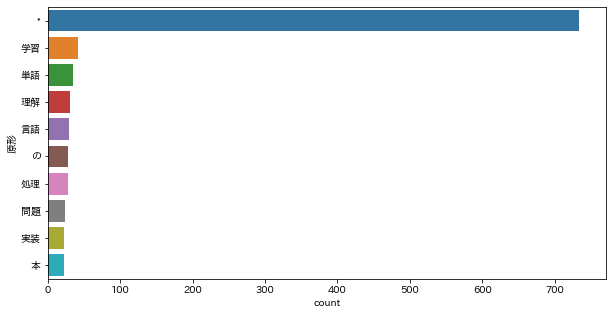

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
plt.figure(figsize=(10, 5))
sns.barplot(x=count['count'], y=count['原形'])

####  ワードクラウド 名詞のみ 原形

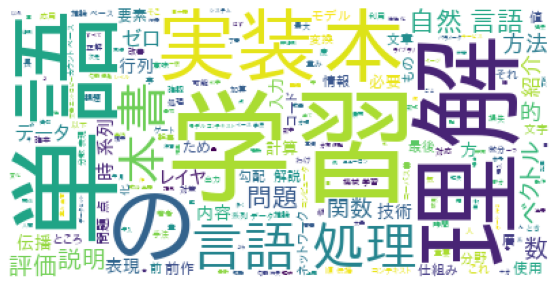

In [22]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import japanize_matplotlib

font_path = 'C:/Users/you-m/AppData/Local/Microsoft/Windows/Fonts/ipagp.ttf'
cloud = WordCloud(background_color='white', font_path=font_path).generate(' '.join(noun['原形'].values))
plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis("off")
#plt.savefig('data/wc_noun_base_2.png')
plt.show()

####  1文字の単語も出力

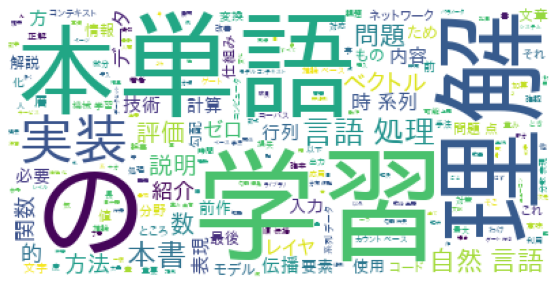

In [23]:
cloud = WordCloud(background_color='white', font_path=font_path, regexp="[\w']+").generate(' '.join(noun['原形'].values))
plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis("off")
#plt.savefig('data/wc_noun_base_1.png')
plt.show()

####  名詞のみ 表層形

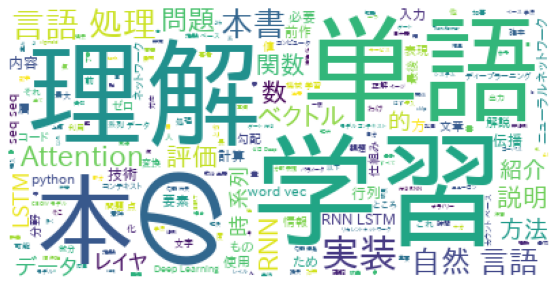

In [24]:
cloud = WordCloud(background_color='white', font_path=font_path).generate(' '.join(noun['表層形'].values))
plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis("off")
#plt.savefig('data/wc_noun_surface.png')
plt.show()

####  名詞+動詞 原形

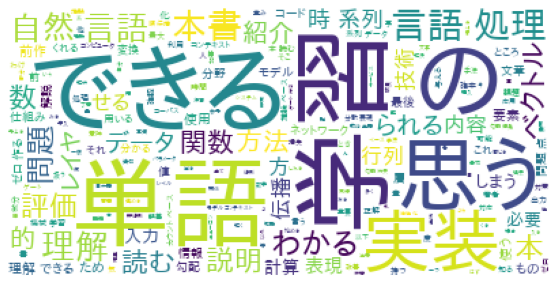

In [25]:
cloud = WordCloud(background_color='white', font_path=font_path).generate(' '.join(verb['原形'].values))
plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis("off")
#plt.savefig('data/wc_noun-verb_base.png')
plt.show()

In [15]:
import bs4           
import time
import re
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd
import pprint
import json
 
CHROME_DRIVER = r'C:\Program Files\chromedriver_win32\Chromedriver'
FILE_PATH = './f.json'
 
# Amazonページ取得
def get_page_from_amazon(url):
     
    text = ""
    #　ヘッドレスモードでブラウザを起動
    options = Options()
    options.add_argument('--headless')
     
    # ブラウザーを起動
    driver = webdriver.Chrome(CHROME_DRIVER, options=options)
    driver.get(url)
    driver.implicitly_wait(10)  # 見つからないときは、10秒まで待つ
     
    text = driver.page_source
         
    # ブラウザ停止
    driver.quit()
     
    return text
 
# 全ページ分をリストにする
def get_all_reviews(url):
    rvw_list = []
    i = 1
    while True:
        print(i,'searching')
        i += 1
        text = get_page_from_amazon(url)
        amazon_soup = bs4.BeautifulSoup(text, features='lxml')
 
        for ratings in amazon_soup.find_all("div", attrs={"data-hook": "review"}):     
            submission_date = ratings.find("span", {'data-hook':'review-date'}).text
            rating = ratings.find('i', attrs={"data-hook": "review-star-rating"}).text
            review_txt = ratings.find("span", {'data-hook':'review-body'}).text
            #paid = ratings.find("span", attrs={"class": "a-color-success a-text-bold"})
            print(submission_date + "@" + rating + "@" + review_txt)
            print('\n')
             
            if submission_date:
                 
                rating = rating.replace("5つ星のうち", "")
                submission_date = extract_date(submission_date)
                 
                info = {}
                info["postdate"] = submission_date
                info["rating"] = rating
                info["review_txt"] = review_txt
             
                rvw_list.append(info)
        # 次へボタン
        next_page = amazon_soup.select('li.a-last a')   
 
        if next_page != []:    
            next_url = 'https://www.amazon.co.jp/' + next_page[0].attrs['href']    
            url = next_url
            # 最低でも1秒は間隔をあける
            time.sleep(1)       
        else:
            break
 
    return rvw_list
 
def extract_date(s):
    date_pattern = re.compile('(\d{4})年(\d{1,2})月(\d{1,2})日')
    result = date_pattern.search(s)
    if result:
        y, m, d = result.groups()
         
        return str(y) + str(m.zfill(2)) + str(d.zfill(2))
    else:
        return None
     
if __name__ == '__main__':
     
    #　Amzon商品ページ
    url = 'https://www.amazon.co.jp/%E3%82%BC%E3%83%AD%E3%81%8B%E3%82%89%E4%BD%9C%E3%82%8BDeep-Learning-%E2%80%95%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%86%E7%B7%A8-%E6%96%8E%E8%97%A4-%E5%BA%B7%E6%AF%85/dp/4873118360/ref=pd_bxgy_img_1/355-0524326-3450411?pd_rd_w=2Mdz9&pf_rd_p=d8f6e0ab-48ef-4eca-99d5-60d97e927468&pf_rd_r=VV4FVMSSH32HCQG7450Y&pd_rd_r=f2b4ef82-efd8-4bf5-a964-4b6aaf2ce2f6&pd_rd_wg=0e0uG&pd_rd_i=4873118360&psc=1'
    # URLをレビューページのものに書き換える
    new_url = url.replace('dp', 'product-reviews')
     
    # レビューの取得
    rvw_list = get_all_reviews(new_url)    
     
    # データフレームに変換
    df = pd.DataFrame(rvw_list)
    
    # jsonとして保存
    df.to_json(FILE_PATH, orient='records',force_ascii=False)
    #print(df.to_json(force_ascii=False))

1 searching
2018年12月15日に日本でレビュー済み@5つ星のうち5.0@

  そうそう、こういうことが知りたかった！ライブラリの使い方なんてちょっと検索すればわかる。数学的・構造的な解説が丁寧にされていて、とても良かったです！ありがとうございます！最初この本から読み始めましたが1章に時間がかかり過ぎ、「ゼロから作るDeep Leaning」(1の方)から出直しました。1日8時間くらいとしてゼロから作るDeep Leaning　5日ゼロから作るDeep Leaning 2(本書)　10日くらいで読了しました。最初から1の方を読んでいれば、2はもうちょっと早く読めたと思います。最後の方で、一見同じに見える変数が関数によって異なることに気づき、だーっと戻って確認したので、そこに最初から気づいている人は更に早く読み終えられると思います。"先に言ってよ"的な部分は1に比べると2の方がちょっと多いかな(汗)。最終的にはわかります。数学的には、線形代数と微分積分、ちょっとだけ情報理論、の知識があった方がわかりやすいです。ポイントは配列の出てくる形を確認すること。git hubから落としてきたスクリプトを全て解読し、printを挿入しながら動かして確認しました。また、本スクリプト以外に、端末でインタプリタ or spyderを起動しておいて、ちょっとした関数の出力結果などを確認しながら読み進めました。pythonのcopyの性質を生かして作った部分がとっても参考になりました。「そうかー、こうやって書くんだ！」って、うなっちゃいました。さらっと解読しただけだと、ものすごくよくわかってる人以外は気付かないと思います。「ん？」って思ったところはあるので、まとめてオライリーにメールしてみようと思っています。もしかしたらもう改訂されてるかな？オライリーさん、ごめんなさい。私は今までオライリーの本の良い評判を一度も聞いたことがなかったので、1冊も持っていませんでした。これを機に考え方を改めます(笑)。どこの本でもそうだけど、日本人が書いたのか訳書なのかという境目はある気がする。訳の良し悪しではなく、ツボが違う、みたいな。あと、本書は文字フォントが読みやすいです(書籍で購入)。




2019年12月8日に日本でレビュー済み@5つ星のうち3.0@

  まえがきに「冒険の書」

3 searching


['そうそう', 'ソウソウ', 'そうそう', '名詞-一般', '', '']
['、', '、', '、', '記号-読点', '', '']
['こういう', 'コウイウ', 'こういう', '連体詞', '', '']
['こと', 'コト', 'こと', '名詞-非自立-一般', '', '']
['が', 'ガ', 'が', '助詞-格助詞-一般', '', '']
['知り', 'シリ', '知る', '動詞-自立', '五段・ラ行', '連用形']
['たかっ', 'タカッ', 'たい', '助動詞', '特殊・タイ', '連用タ接続']
['た', 'タ', 'た', '助動詞', '特殊・タ', '基本形']
['！', '！', '！', '記号-一般', '', '']
['ライブラリ', 'ライブラリ', 'ライブラリ', '名詞-一般', '', '']
['の', 'ノ', 'の', '助詞-連体化', '', '']
['使い方', 'ツカイカタ', '使い方', '名詞-一般', '', '']
['なんて', 'ナンテ', 'なんて', '助詞-副助詞', '', '']
['ちょっと', 'チョット', 'ちょっと', '副詞-助詞類接続', '', '']
['検索', 'ケンサク', '検索', '名詞-サ変接続', '', '']
['すれ', 'スレ', 'する', '動詞-自立', 'サ変・スル', '仮定形']
['ば', 'バ', 'ば', '助詞-接続助詞', '', '']
['わかる', 'ワカル', 'わかる', '動詞-自立', '五段・ラ行', '基本形']
['。', '。', '。', '記号-句点', '', '']
['数学', 'スウガク', '数学', '名詞-一般', '', '']
['的', 'テキ', '的', '名詞-接尾-形容動詞語幹', '', '']
['・', '・', '・', '記号-一般', '', '']
['構造', 'コウゾウ', '構造', '名詞-一般', '', '']
['的', 'テキ', '的', '名詞-接尾-形容動詞語幹', '', '']
['な', 'ナ', 'だ', '助動詞', '特殊・ダ', '体言接続']
['解説', 'カイセツ'

['思っ', 'オモッ', '思う', '動詞-自立', '五段・ワ行促音便', '連用タ接続']
['て', 'テ', 'て', '助詞-接続助詞', '', '']
['い', 'イ', 'いる', '動詞-非自立', '一段', '連用形']
['た', 'タ', 'た', '助動詞', '特殊・タ', '基本形']
['内容', 'ナイヨウ', '内容', '名詞-一般', '', '']
['と', 'ト', 'と', '助詞-格助詞-一般', '', '']
['は', 'ハ', 'は', '助詞-係助詞', '', '']
['少々', 'ショウショウ', '少々', '副詞-助詞類接続', '', '']
['違', 'チガイ', '違', '名詞-固有名詞-人名-姓', '', '']
['て', 'テ', 'て', '助詞-接続助詞', '', '']
['い', 'イ', 'いる', '動詞-非自立', '一段', '連用形']
['まし', 'マシ', 'ます', '助動詞', '特殊・マス', '連用形']
['た', 'タ', 'た', '助動詞', '特殊・タ', '基本形']
['が', 'ガ', 'が', '助詞-接続助詞', '', '']
['、', '、', '、', '記号-読点', '', '']
['最後', 'サイゴ', '最後', '名詞-一般', '', '']
['まで', 'マデ', 'まで', '助詞-副助詞', '', '']
['読破', 'ドクハ', '読破', '名詞-サ変接続', '', '']
['し', 'シ', 'する', '動詞-自立', 'サ変・スル', '連用形']
['まし', 'マシ', 'ます', '助動詞', '特殊・マス', '連用形']
['た', 'タ', 'た', '助動詞', '特殊・タ', '基本形']
['し', 'シ', 'し', '助詞-接続助詞', '', '']
['、', '、', '、', '記号-読点', '', '']
['全て', 'スベテ', '全て', '名詞-副詞可能', '', '']
['の', 'ノ', 'の', '助詞-連体化', '', '']
['内容', 'ナイヨウ', '内容', '名詞-一般', '', '']
['を', 

['表現', 'ヒョウゲン', '表現', '名詞-サ変接続', '', '']
['の', 'ノ', 'の', '助詞-連体化', '', '']
['要素', 'ヨウソ', '要素', '名詞-一般', '', '']
['数', 'スウ', '数', '名詞-接尾-一般', '', '']
['）', '）', '）', '記号-括弧閉', '', '']
['4', '4', '4', '名詞-数', '', '']
['.', '.', '.', '記号-一般', '', '']
['word2vec', 'ワードツーベック', 'Word2Vec', '名詞-固有名詞-一般', '', '']
['の', 'ノ', 'の', '助詞-連体化', '', '']
['高速化', 'コウソクカ', '高速化', '名詞-固有名詞-一般', '', '']
['問題点', 'モンダイテン', '問題点', '名詞-固有名詞-一般', '', '']
['：', '：', '：', '記号-一般', '', '']
['\u3000', '\u3000', '\u3000', '記号-空白', '', '']
['大きな', 'オオキナ', '大きな', '連体詞', '', '']
['コーパス', 'コーパス', 'コーパス', '名詞-一般', '', '']
['を', 'ヲ', 'を', '助詞-格助詞-一般', '', '']
['扱う', 'アツカウ', '扱う', '動詞-自立', '五段・ワ行促音便', '基本形']
['とき', 'トキ', 'とき', '名詞-非自立-副詞可能', '', '']
['に', 'ニ', 'に', '助詞-格助詞-一般', '', '']
['計算', 'ケイサン', '計算', '名詞-サ変接続', '', '']
['量', 'リョウ', '量', '名詞-接尾-一般', '', '']
['が', 'ガ', 'が', '助詞-格助詞-一般', '', '']
['増える', 'フエル', '増える', '動詞-自立', '一段', '基本形']
['改善', 'カイゼン', '改善', '名詞-サ変接続', '', '']
['：', '：', '：', '記号-一般', '', '']
['・', '・

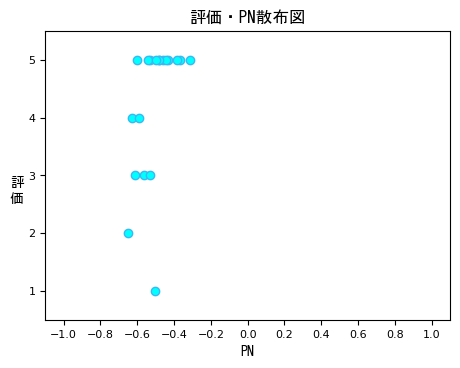

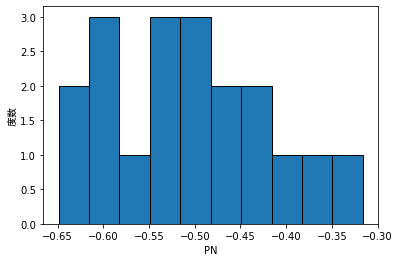

,postdate,rating,review_txt,pn
0,20181215,5.0,\n\n そうそう、こういうことが知りたかった！ライブラリの使い方なんてちょっと検索すれば...,-0.462663
1,20191208,3.0,\n\n まえがきに「冒険の書」また「問題」とその「解決」とあるとおり、「問題」とその「解...,-0.564053
2,20191130,5.0,\n\n 仕事とか、儲けるとか、そういうことでこの本を読むことは、あるいは向いていないかも...,-0.528320
3,20190101,2.0,\n\n 初心者には重たい。相談者がいないと内容を理解できないと思います。\n\n,-0.648993
4,20210808,1.0,\n\n なんで本書の評価がこれほど高いのか理解に苦しむ。本書の大半を占めるRNN/LST...,-0.505839
5,20200903,5.0,\n\n 分布仮説（後述）にもとづく単語の意味を捉える方法（１）を除く）として、以下のアル...,-0.484348
6,20200521,3.0,\n\n RNNに関する説明は分かり易かった。ただ、この著者のコードは何がステートフルで何...,-0.533175
7,20190825,5.0,\n\n 前作で半分くらい使って説明していた内容が1章に簡潔にまとまっていて、復習から出来...,-0.602587
8,20200814,5.0,\n\n Deep Learningの自然言語処理は難しく、現実の問題に応用するには敷居が...,-0.430898
9,20180922,5.0,\n\n 文句なしです。まずすべてのサンプルコードが１００％動きます。この一番大事なところ...,-0.445179


In [60]:
import pandas as pd
import json
import MeCab
import re
import matplotlib.pyplot as plt
import numpy as np
 
FILE_PATH = "./f.json"
DIC_PATH = "-d C:/Program Files/MeCab/dic/mecab-ipadic-neologd" # 辞書ipadic-neologdがあれば、そのパスを記述
 
def get_dic_list(text):
     
    mecab = MeCab.Tagger('-Ochasen -d "C:/Program Files/MeCab/dic/mecab-ipadic-neologd"')
    parsed = mecab.parse(text)      
    lines = parsed.split('\n') 
    lines = lines[0:-2]     
    
    dic_list = []
    for line in lines:
        tmp = re.split('\t|,', line)
        print(tmp)
        dic = {'dsp':tmp[0], 'kind_1':tmp[1], 'kind_2':tmp[2], 'kind_3':tmp[3], 'kind_4':tmp[4], 'value':tmp[5]}
        dic_list.append(dic)
         
    return dic_list
 
# PN判定
def judge_pn(pn_dict, dic_list):
     
    all_pn = 0
    count = 0
    result = ""
     
    for word in dic_list:
        base = word['kind_2']        
        if base in pn_dict:
            count = count + 1
            pn = float(pn_dict[base])  
            all_pn = all_pn + pn
 
    if all_pn != 0:
        result = all_pn / count
     
    return result  

# Amazonレビューの読み込み
 
json_open = open(FILE_PATH, 'r',encoding='utf-8')
review_list = json.load(json_open)
 

# ネガポジ辞書の読み込み
pn_df = pd.read_csv('C:/Program Files/dic/pn_ja.dic.txt',\
                    sep=':',
                    encoding='utf-8',
                    #encoding='cp932',
                    names=('Word','Reading','POS', 'PN')
                   )
 
# ネガポジ辞書をデータフレームからdict型に変換
word_list = list(pn_df['Word'])
pn_list = list(pn_df['PN'])  
pn_dict = dict(zip(word_list, pn_list))


new_review_list = []
for review in review_list:
     
    review_txt = review["review_txt"]
    rating = review["rating"]
    postdate = review["postdate"]
    dic_list = get_dic_list(review_txt)
    pn = judge_pn(pn_dict, dic_list)
    
    review["pn"] = pn
    
    if pn:
        new_review_list.append(review)
     
new_review_list_df = pd.DataFrame(new_review_list)


# 欠損値が一つでも含まれる行を削除
new_review_list_df = new_review_list_df.dropna(how='any')
x = new_review_list_df["pn"].astype(float)
y = new_review_list_df["rating"].astype(float)

fig = plt.figure(dpi=100, figsize=(4.6,3.8))
#fig.suptitle('評価：PN', fontsize=10, x=0.27, y=0.87)
ax = fig.add_subplot(111)
ax.yaxis.set_label_coords(-0.07,0.4)
 
# 目盛の値
xscale = np.arange(-1.0, 1.1, 0.2)
yscale = np.arange(0, 6, 1.0)
 
# 散布図を描画
plt.scatter(x, y, c='#00FFFF', edgecolors="#37BAF2")
plt.title("評価・PN散布図", fontname="MS Gothic")
plt.xticks(xscale, fontsize=8)
plt.yticks(yscale, fontsize=8)
plt.xlabel("PN", fontsize=10, fontname="MS Gothic")
plt.ylabel("評\n価", fontsize=10, rotation=0, fontname="MS Gothic")
plt.xlim(-1.1, 1.1)
plt.ylim(0.5, 5.5)
  
plt.subplots_adjust(left=0.1, right=0.98, bottom=0.13, top=0.89)
plt.savefig("result_1.png", facecolor="white")
 

# ヒストグラムを表示
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(x, bins=10, histtype='barstacked', ec='black')
ax.set_xlabel('PN')
ax.set_ylabel('度数', fontname="MS Gothic")
plt.show()
new_review_list_df
